# Generalized Language Models

Good reference: https://lilianweng.github.io/lil-log/2019/01/31/generalized-language-models.html

Slides: https://docs.google.com/presentation/d/1xhOocjNJ-6YU_jXPJb_Yi0Vloen65QCyM51S7-Dadfk/edit?usp=sharing

In [1]:
# Use pytorch kernel and install TF
!pip install --upgrade torch
!pip install --upgrade tensorflow

     |████████████████████████████████| 119.6 MB 98.0 MB/s eta 0:00:01  |█▍                              | 5.0 MB 2.6 MB/s eta 0:00:45                      | 6.9 MB 2.6 MB/s eta 0:00:44     |██▎                             | 8.7 MB 2.6 MB/s eta 0:00:44     |████▌                           | 16.8 MB 1.6 MB/s eta 0:01:06     |█████████                       | 33.3 MB 3.0 MB/s eta 0:00:29     |█████████████▋                  | 50.8 MB 3.5 MB/s eta 0:00:20     |████████████████▋               | 62.1 MB 2.8 MB/s eta 0:00:21     |████████████████████▏           | 75.4 MB 13.6 MB/s eta 0:00:04     |█████████████████████▉          | 81.5 MB 2.2 MB/s eta 0:00:18MB/s eta 0:00:01     |█████████████████████████████   | 108.1 MB 2.1 MB/s eta 0:00:06███████▎ | 113.0 MB 2.1 MB/s eta 0:00:04
     |████████████████████████████████| 195.7 MB 137 kB/s  eta 0:00:01  |▉                               | 5.4 MB 4.9 MB/s eta 0:00:39     |█▊                              | 10.8 MB 3.5 MB/s eta 0:00:54     |██   

  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-macosx_10_9_x86_64.whl size=32727 sha256=7e5b04254c66f69eb13b9ca76833f4c0b138c8dd7c25697d35a634e99b2ceb6a
  Stored in directory: /Users/longmini/Library/Caches/pip/wheels/5f/fd/9e/b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built wrapt
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.9.0
    Uninstalling absl-py-0.9.0:
      Successfully uninstalled absl-py-0.9.0
  Attempting uninst

## Classification with Embeddings and BERT

We can use many approaches as seen earlier. A good summary of classification approaches in various NLP libraries is discussed here: https://towardsdatascience.com/which-is-the-best-nlp-d7965c71ec5f


In [3]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
from google.colab import drive
drive.mount('/content/drive')  # Add My Drive/<>

import os
os.chdir('drive/My Drive')
os.chdir('Teaching/NLP')

Mounted at /content/drive


## Sequence of Classification Approaches

Various forms of input are possible:

1. Use a single vector from the TDM for classification of each document. Easy to construct, but lacking context. Input size is fixed. Vocab size is large. 

2. Use a single TFIDF vector. Same as TDM vectors. 

3. Word2Vec. Convert each word in the document into a fixed length vector. Combine vectors into a matrix for the document and this is the input into the classifier. Requires a package like gensim to make the word embeddings, some compute effort required. Fixed input size, 100-300, not huge as in TDM, TFIDF. 

4. Doc2Vec. Each document is converted into a vector, which is input into the classifier (also needs gensim). Input size is fixed. 

5. MPN. Use a standard NN to create word embeddings. Only takes a few tokens and truncates the document/sentence. Enlarging the window results in an explosion in parameters. No context. 

6. RNN. Keeps track of word sequences and generates one embedding for a sequence of words. Can take any sequence length. Same weight matrix for all inputs. Keeps context. But slow, loses track of words further back in the sequence, so may be giving greater weight to words at the end. Vanishing gradients. 

7. LSTMs. Same as RNN, but tries to fix the problem of vanishing gradients for RNNs. Goes in only one direction, so full context is missed. For example, in translation, words before and after current word matter. 

8. CNN. Faster than RNNs as they do not have to wait to process tokens sequentially. Parallelization possible. Not fixed input, so padding is required. 

9. Attention. These are bidirectional, so work better for all tasks as they have greater context. Also computationally better than LSTMs. No fixed input, limited maximum sequence length.  

## Read in the data

Datasets:
1. Reddit news with Dow sign, https://www.kaggle.com/aaron7sun/stocknews 
2. Movie reviews, https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews 
3. Financial Phrase Bank, https://www.researchgate.net/publication/251231364_FinancialPhraseBank-v10  

In [16]:
# Read data
# df = pd.read_csv('NLP_data/Combined_News_DJIA.csv')  # Reddit News vs Dow data
# df = pd.read_csv('NLP_data/movie_review.csv', parse_dates=True, index_col=0)  # Movie Reviews data
df = pd.read_csv('NLP_data/Sentences_AllAgree.txt', sep=".@", header=None)  # Finbert data
print(df.shape)
# df.columns = ["Label","Text"]  # for movie reviews
df.columns = ["Text","Label"]
df.head()

(2264, 2)


<ipython-input-16-7e830336685e>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('NLP_data/Sentences_AllAgree.txt', sep=".@", header=None)  # Finbert data


,Text,Label
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive


In [14]:
# # Remove all the b-prefixes (for DJIA dataset)
# for k in range(1,26):
#     colname = "Top"+str(k)
#     df[colname] = df[colname].str[2:]

# # Prepare the data 
# columns = ['Top' + str(i+1) for i in range(25)]
# df['Text'] = df[columns].apply(lambda x: ' '.join(x.astype(str)), axis=1)
# df = df[['Label', 'Text']]
# df.head()

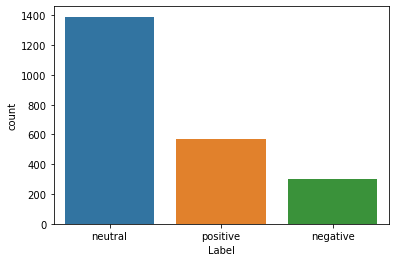

In [17]:
# Plot class distribution
sns.countplot(x='Label', data=df)

## Now install raw text tools

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [19]:
# See Transformers from Hugging Face: https://huggingface.co/transformers/ 
# Simple Transformers: https://github.com/ThilinaRajapakse/simpletransformers

!pip install gensim
!pip install transformers

In [20]:
import json
from sklearn import feature_extraction, feature_selection, metrics
from sklearn import model_selection, naive_bayes, pipeline, manifold, preprocessing
import gensim
import gensim.downloader as gensim_api
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
import transformers

/Users/longmini/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [21]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/longmini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/longmini/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
# Use texthero as an alternative text cleaner

def removeNumbersStr(s):
    for c in range(10):
        n = str(c)
        s = s.replace(n," ")
    return s

def cleanText(text, stem=False, lemm=True, stop=True):
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())  # remove stuff
    text = removeNumbersStr(text)
    text = text.split()  # tokenize
    if stop is not None:  # remove stopwords
        text = [word for word in text if word not in stopwords]
    if stem == True:  # stemming
        ps = nltk.stem.porter.PorterStemmer()
        text = [ps.stem(word) for word in text]
    if lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text]
    text = " ".join(text) 
    return text

In [23]:
df["cleanTxt"] = [cleanText(df.Text[j]) for j in range(len(df.Label))]
print(df.shape)
df.head()

(2264, 3)


,Text,Label,cleanTxt
0,"According to Gran , the company has no plans t...",neutral,according gran company plan move production ru...
1,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter componenta net sale doubled eur e...
2,"In the third quarter of 2010 , net sales incre...",positive,third quarter net sale increased eur mn operat...
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive,operating profit rose eur mn eur mn correspond...
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive,operating profit totalled eur mn eur mn repres...


In [24]:
df_train, df_test = model_selection.train_test_split(df, test_size=0.2)
y_train = df_train["Label"].values 
y_test = df_test["Label"].values

In [25]:
# Choose BOW or TFIDF in NLTK
# vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))  # BOW
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))  # TFIDF

In [26]:
corpus = df_train["cleanTxt"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus) 
X_train

<1811x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 29445 stored elements in Compressed Sparse Row format>

In [28]:
vocab = vectorizer.vocabulary_   # is a dict
vocab.items()

dict_items([('port', 4147), ('facility', 1217), ('throughput', 8396), ('teus', 8331), ('mln', 2110), ('ton', 8540), ('general', 1420), ('cargo', 412), ('port facility', 4149), ('throughput teus', 8397), ('teus mln', 8332), ('ton general', 8542), ('saunalahti', 6242), ('part', 3502), ('elisa', 1064), ('group', 1470), ('saunalahti part', 6243), ('part elisa', 3511), ('sunk', 7834), ('metre', 2060), ('fixed', 1346), ('bottom', 330), ('mud', 2264), ('vacuum', 9177), ('sunk depth', 7835), ('mud vacuum', 2265), ('deal', 888), ('includes', 1628), ('entire', 1095), ('personnel', 3829), ('planmill', 3959), ('oy', 3335), ('transfer', 8720), ('new', 2459), ('company', 525), ('socalled', 7198), ('old', 2906), ('employee', 1070), ('deal includes', 891), ('includes entire', 1630), ('personnel planmill', 3832), ('planmill oy', 3960), ('oy transfer', 3356), ('transfer new', 8727), ('new company', 2466), ('socalled old', 7200), ('old employee', 2907), ('growth', 1491), ('rate', 5094), ('paying', 3632),

In [29]:
X_train.shape

(1811, 10000)

## Visualize the DTM

Text(114.0, 0.5, 'Documents')

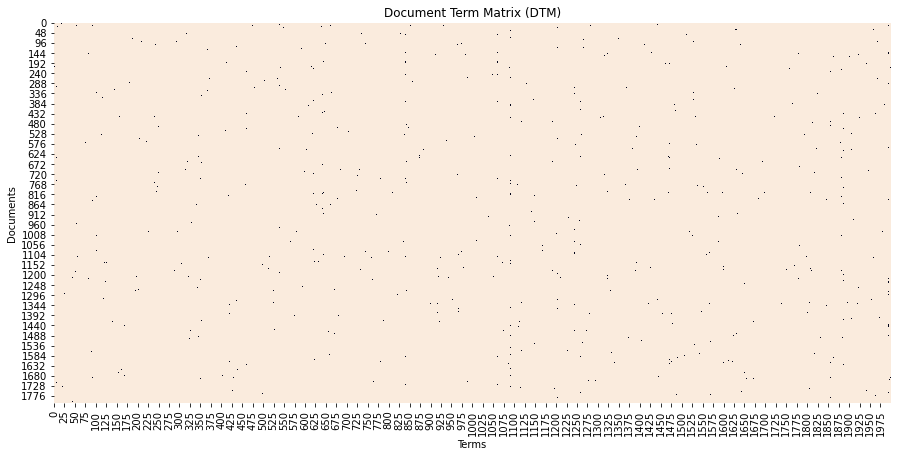

In [18]:
figure(figsize=(15,7))
sns.heatmap(X_train.todense() [:,np.random.randint(0,X_train.shape[1],2000)]==0, 
            vmin=0, vmax=1, cbar=False).set_title('Document Term Matrix (DTM)')
xlabel('Terms'); ylabel('Documents')

## Reduce the dimension of the vocabulary

In [19]:
# Feature reduction using feature selection in sklearn
y = df_train["Label"]
X_names = vectorizer.get_feature_names() 
p_value_limit = 0.75
df_features = pd.DataFrame() 
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==cat) 
    df_features = df_features.append(pd.DataFrame({"feature":X_names, "score":1-p, "y":cat})) 
    df_features = df_features.sort_values(["y","score"],ascending=[True,False])
    df_features = df_features[df_features["score"]>p_value_limit]
X_names = df_features["feature"].unique().tolist()
print(type(X_names)); print(X_names[:10])
print("# features =",len(X_names))

<class 'list'>
['decreased', 'decreased eur', 'fell', 'eur mn', 'mn', 'sale decreased', 'operating loss', 'fell eur', 'compared profit', 'eur']
# features = 1221


In [20]:
# !conda install -c conda-forge xgboost -y

## TFIDF Transform Classification

In [21]:
# Define Vectorizer
vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=X_names)
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus) 
vocab = vectorizer.vocabulary_
print("Check vocab length:", len(vocab))

# Define Classifier
import xgboost as xgb
# classifier = xgb.XGBClassifier(objective="binary:logistic") # for 2 classes
classifier = xgb.XGBClassifier(objective="multi:softmax") # for multiclass

Check vocab length: 1221


In [22]:
# Pipeline using sklearn
model = pipeline.Pipeline([("vectorizer", vectorizer),
                           ("classifier", classifier)])

In [23]:
model["classifier"].fit(X_train, y_train)
X_test = df_test["cleanTxt"].values 
predicted = model.predict(X_test) 
predicted_prob = model.predict_proba(X_test)

In [24]:
accuracy = metrics.accuracy_score(y_test, predicted) 
# auc = metrics.roc_auc_score(y_test, predicted_prob[:,1])  # only for binary classification
print("Accuracy:", round(accuracy,2))
# print("Auc:", round(auc,2))
print("Detail:") 
print(metrics.classification_report(y_test, predicted))
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

Accuracy: 0.83
Detail:
              precision    recall  f1-score   support

    negative       0.86      0.47      0.61        64
     neutral       0.85      0.96      0.90       281
    positive       0.73      0.68      0.70       108

    accuracy                           0.83       453
   macro avg       0.81      0.70      0.74       453
weighted avg       0.82      0.83      0.81       453

[[ 30  16  18]
 [  1 271   9]
 [  4  31  73]]


## Using Embeddings

Ideally, we want an embedding model which gives us the smallest embedding vector and works great for the task. The smaller the embedding size, the lesser the compute required for training as well as inference.

Use a pre-trained model below or roll one's own embeddings. We will do the latter. (Hence the Google News embeddings of vector size 300 are ignored.)

In [25]:
%%time
# Load a word-embedding model, only required for the first time
# nlp = gensim_api.load("word2vec-google-news-300")  # pre-trained by Google
# nlp = gensim_api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data

# Saving the word vectors to disk and then reloading when needed
# nlp.save('googlenews_vectors.kv')

# from gensim.models import KeyedVectors
# reloaded_word_vectors = KeyedVectors.load('googlenews_vectors.kv')

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.25 µs


In [26]:
# Create embeddings from data itself
corpus = df_train["cleanTxt"]

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, len(lst_words), 1)] 
    lst_corpus.append(lst_grams)

#### Use the next two blocks only if not using google word vectors

In [27]:
## detect bigrams and trigrams
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, delimiter=" ".encode(), min_count=5, threshold=10) 
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus],
                                                  delimiter=" ".encode(), min_count=5, threshold=10) 
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

## Run this for bigrams (and trigrams, if desired)
lst_corpus = list(bigrams_detector[lst_corpus]) 
# lst_corpus = list(trigrams_detector[lst_corpus])

print("Size of training corpus:", len(lst_corpus))
print("size of each element:", len(lst_corpus[0]), len(lst_corpus[1])) # print first two docs length
# lst_corpus

Size of training corpus: 1811
size of each element: 9 12


In [28]:
%%time
# fit w2v
# Params: word vector size, window within sentence, skip grams (sg) 
vector_size = 300
nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=vector_size, window=8, min_count=1, sg=1, iter=30)

CPU times: user 7.92 s, sys: 74.7 ms, total: 8 s
Wall time: 4.78 s


#### Use the chosen word vector system 

In [29]:
# Visualize word context
word = "profit"
vector_size = len(nlp[word])
word_vec = nlp[word] # to see a sample word vector
print(nlp.most_similar(word, topn=5))
## word embedding
tot_words = [word] + [j[0] for j in nlp.most_similar(word, topn=25)]
X = nlp[tot_words]
X.shape

[('warning', 0.9398658275604248), ('loss', 0.9250315427780151), ('operating loss', 0.9025672674179077), ('earned', 0.9015887975692749), ('revealed', 0.9007972478866577)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__g

(26, 300)

In [30]:
## Reduce dimensionality from vector_size to 3
pca = manifold.TSNE(perplexity=40, n_components=3, init='pca') 
X = pca.fit_transform(X)
print(X.shape)

## make X into dataframe
df_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"]) 
df_["input"] = 0
df_["input"].iloc[0:1] = 1


(26, 3)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


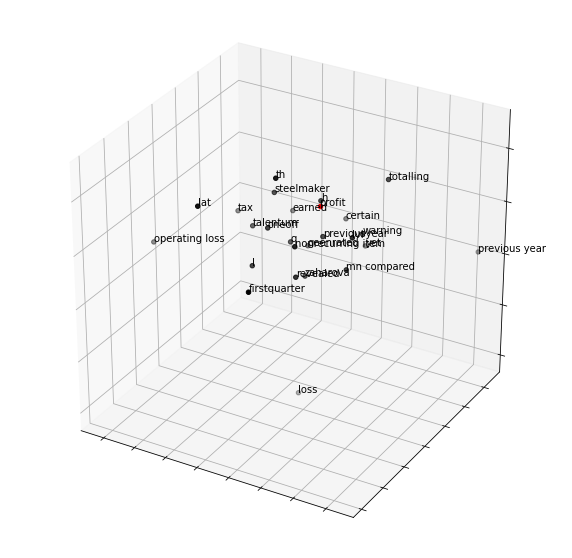

In [31]:
## TSNE plot 3d
from mpl_toolkits.mplot3d import Axes3D 
fig = figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(df_[df_["input"]==0]['x'],
df_[df_["input"]==0]['y'],
df_[df_["input"]==0]['z'], c="black") 
ax.scatter(df_[df_["input"]==1]['x'],
df_[df_["input"]==1]['y'],
df_[df_["input"]==1]['z'], c="red") 
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[],
yticklabels=[], zticklabels=[])
for label, row in df_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

### Now prepare the text embeddings to go into the neural network

In [32]:
## tokenize text, use keras processing
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', oov_token="NaN", 
                                       filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') 
tokenizer.fit_on_texts(lst_corpus)
vocab = tokenizer.word_index

## create sequence
lst_text2seq = tokenizer.texts_to_sequences(lst_corpus) # token ids for words in each doc
print(len(lst_text2seq))
lst_text2seq[0]

1811


[460, 200, 406, 751, 47, 2104, 124, 59, 17]

In [33]:
# TRAIN DATASET
## padding sequence
max_seq_length = 128
X_train = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=max_seq_length, padding="post", truncating="post")
print(X_train)
print(X_train.shape)

[[ 460  200  406 ...    0    0    0]
 [1427 2105  613 ...    0    0    0]
 [ 752   27   68 ...    0    0    0]
 ...
 [   8 1836    7 ...    0    0    0]
 [ 128  165  116 ...    0    0    0]
 [ 353 2003 1941 ...    0    0    0]]
(1811, 128)


In [34]:
# TEST DATA SET
# Create embeddings from data itself
corpus = df_test["cleanTxt"]

## create list of lists of unigrams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, len(lst_words), 1)] 
    lst_corpus.append(lst_grams)

# lst_corpus = list(bigrams_detector[lst_corpus]) # Use if we want bigrams
# lst_corpus = list(trigrams_detector[lst_corpus]) # Use if we want trigrams
print(len(lst_corpus))
# lst_corpus

453


In [35]:
## create sequence
lst_text2seq = tokenizer.texts_to_sequences(lst_corpus)

## padding sequence
X_test = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=max_seq_length, padding="post", truncating="post")
print(X_test)
print(X_test.shape)

[[ 752    1  131 ...    0    0    0]
 [   1    1  142 ...    0    0    0]
 [ 946    1 1444 ...    0    0    0]
 ...
 [1043  692    1 ...    0    0    0]
 [  29 4342   36 ...    0    0    0]
 [ 131   45  826 ...    0    0    0]]
(453, 128)


In [36]:
# Create embedding matrix (master list of embeddings from which we create the token embeddings for each doc)
## start the matrix (length of vocabulary x vector size) with all 0s
embeddings = zeros((len(vocab)+1, vector_size))
for word,idx in vocab.items():
    ## update the row with vector
    try:
        embeddings[idx] = nlp[word]
    ## if word not in model then skip and the row stays all 0s
    except:  
        pass
    
print(embeddings.shape)  # This is vocab size V x N embedding dimension 

(4499, 300)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [37]:
# Locate embedding index for a specific word
print("Index of dic[word]:", vocab['profit']) 
print("Embeddings[idx]:", embeddings[vocab[word]].shape, "|vector")


Index of dic[word]: 45
Embeddings[idx]: (300,) |vector


### Building up the NN using LSTMS and attention layer

Bidirectional Recurrent Neural Networks (RNNs) involve duplicating the first recurrent layer in the network so that there are now two layers side-by-side, then providing the input sequence as-is as input to the first layer and providing a reversed copy of the input sequence to the second. This is useful for text processing where the context occurs from both sides of a keyword or phrase. 

In [38]:
## code attention layer
def attention_layer(inputs, neurons):
    x = layers.Permute((2,1))(inputs) 
    x = layers.Dense(neurons, activation="softmax")(x) # 128x128+128=16512
    x = layers.Permute((2,1), name="attention")(x)
    x = layers.multiply([inputs, x]) 
    return x

In [39]:
## input
x_in = layers.Input(shape=(max_seq_length,))
## embedding
x = layers.Embedding(input_dim=embeddings.shape[0],
                     output_dim=embeddings.shape[1],  # VxN=1335900
                     weights=[embeddings],
                     input_length=max_seq_length, 
                     trainable=False)(x_in)
## apply attention
x = attention_layer(x, neurons=max_seq_length)
## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=max_seq_length, dropout=0.2, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=max_seq_length, dropout=0.2))(x)
## final dense layers
x = layers.Dense(64, activation='relu')(x) # 256*64+64=16448
y_out = layers.Dense(3, activation='softmax')(x) #64*3+3=195
## compile 
model = models.Model(x_in, y_out) 
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 128, 300)     1349700     input_1[0][0]                    
__________________________________________________________________________________________________
permute (Permute)               (None, 300, 128)     0           embedding[0][0]                  
__________________________________________________________________________________________________
dense (Dense)                   (None, 300, 128)     16512       permute[0][0]                    
______________________________________________________________________________________________

In [40]:
# !conda install pydot -y
# !conda install pydotplus -y
# !conda install graphviz -y

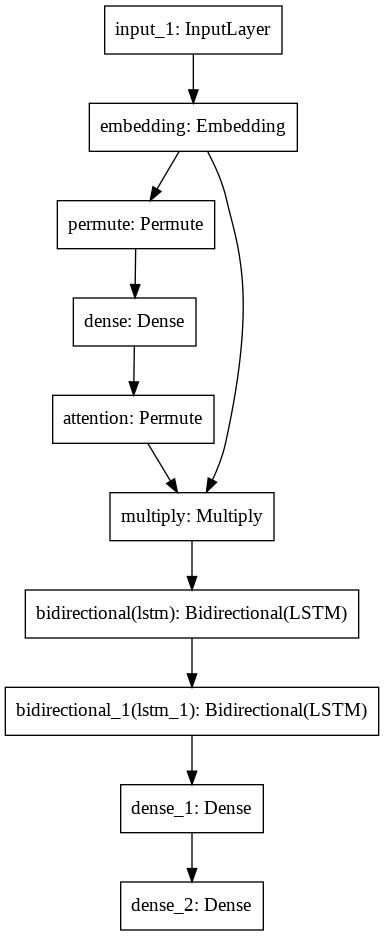

In [41]:
plot_model(model)

In [42]:
## encode y
dic_y_mapping = {n:label for n,label in enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()} 
y_train = np.array([inverse_dic[y] for y in y_train])
y_train

array([2, 1, 0, ..., 2, 0, 1])

In [43]:
%%time
## train (try this with and without a GPU)
training = model.fit(x=X_train, y=y_train, batch_size=32, epochs=25, shuffle=True, verbose=1, validation_split=0.3)

Epoch 1/5
40/40 [==============================] - 40s 84ms/step - loss: 0.9892 - accuracy: 0.6152 - val_loss: 0.7873 - val_accuracy: 0.6673
Epoch 2/5
40/40 [==============================] - 2s 41ms/step - loss: 0.6812 - accuracy: 0.7277 - val_loss: 0.6341 - val_accuracy: 0.7537
Epoch 3/5
40/40 [==============================] - 2s 41ms/step - loss: 0.5947 - accuracy: 0.7796 - val_loss: 0.6098 - val_accuracy: 0.7482
Epoch 4/5
40/40 [==============================] - 2s 40ms/step - loss: 0.6218 - accuracy: 0.7629 - val_loss: 0.7084 - val_accuracy: 0.6581
Epoch 5/5
40/40 [==============================] - 2s 40ms/step - loss: 0.6085 - accuracy: 0.7370 - val_loss: 0.5804 - val_accuracy: 0.7684
CPU times: user 17.4 s, sys: 1.9 s, total: 19.3 s
Wall time: 46.5 s


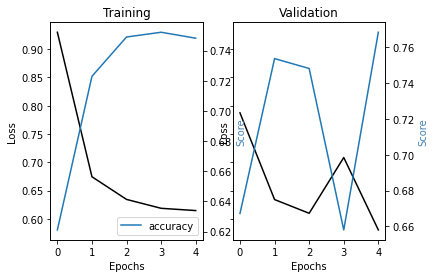

In [44]:
## plot loss and accuracy
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
ax[0].set(title="Training")
ax11 = ax[0].twinx() 
ax[0].plot(training.history['loss'], color='black') 
ax[0].set_xlabel('Epochs') 
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric) 
ax11.set_ylabel("Score", color='steelblue') 
ax11.legend()
ax[1].set(title="Validation")
ax22 = ax[1].twinx() 
ax[1].plot(training.history['val_loss'], color='black') 
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
    ax22.plot(training.history['val_'+metric], label=metric) 
ax22.set_ylabel("Score", color="steelblue")
plt.show()

In [45]:
## test
predicted_prob = model.predict(X_test)   
dic_y_mapping = {0:'negative', 1:'neutral', 2:'positive'}  # for the financial phrase bank dataset
predicted = [dic_y_mapping[argmax(pred)] for pred in predicted_prob] 

In [46]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, predicted) 
# auc = metrics.roc_auc_score(y_test, predicted_prob[:,1])  # only for binary classification
print("Accuracy:", round(accuracy,2))
# print("Auc:", round(auc,2))
print("Detail:") 
print(metrics.classification_report(y_test, predicted))
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

Accuracy: 0.75
Detail:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        64
     neutral       0.84      0.95      0.89       281
    positive       0.54      0.69      0.61       108

    accuracy                           0.75       453
   macro avg       0.46      0.55      0.50       453
weighted avg       0.65      0.75      0.70       453

[[  0  16  48]
 [  0 266  15]
 [  0  33  75]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## BERT

BERT piggybacks on Transformer models, for a technical overview, see: https://drive.google.com/file/d/1G4tEu0SQrYglVIvgRqY17Khlbhvuf-4s/view?usp=sharing 

BERT handles context better than word embeddings. Therefore it takes care of *polysemy*, i.e., same word meaning different things in different context. 

BERT is trained using a denoising objective (masked language modeling), where it aims to reconstruct a noisy version of a sentence back into its original version. The concept is similar to autoencoders. 

The original BERT uses a next-sentence prediction objective, but it was shown in the RoBERTa paper that this training objective doesn’t help that much. In this way, BERT is trained on gigabytes of data from various sources (much of Wikipedia) in an unsupervised fashion.

Google Research and Toyota Technological Institute jointly released a much smaller/smarter Lite Bert called ALBERT. (“ALBERT: A Lite BERT for Self-supervised Learning of Language Representations”). BERT x-large has 1.27 Billion parameters, vs ALBERT x-large with 59 Million parameters! The core architecture of ALBERT is BERT-like in that it uses a transformer encoder architecture, along with GELU activation. It also uses the identical vocabulary size of 30K as used in the original BERT. (V=30,000). 

Downside of BERT is compute: you definitely need a GPU. 

## BERT with transfer learning

BERT input has a special structure. Take the sequence of words - "The paycheck protection program" and it gets encoded as 

CLS | The | paycheck | protection | program | SEP | PAD | PAD | PAD 

There are 3 vectors that are generated by this: 

(1) Token IDs: these are integers that refer to the vocab index. Some have fixed IDs such as 

- CLS = 101 (start id)
- UNK = 100 (unknown id)
- SEP = 102 (end/separator id)
- PAD = 0 (padding slots id)

The actual words get their ids from the vocab. 

(2) Mask = 1 from CLS through SEP, 0 thereafter. It delineates the text from its padding.

(3) Segment = 1 for SEP, zero elsewhere. It counts the number of SEPs in the sentence. 

Steps: 

- tokenize + transform + create embedding

- See the first element of the embedding that is generated, it is what is passed to the NN. 

In [31]:
# Just trying out original BERT
txt = "love the show"
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
input_ids = array(tokenizer.encode(txt))[None,:] 

## Use language model to return hidden layer with embeddings
nlp = transformers.TFBertModel.from_pretrained('bert-base-uncased')
embedding = nlp(input_ids)
print("Structure of BERT input (size of text + 2):", input_ids)
print("Length of embedding structure:", len(embedding))
print("Shape of first element of embedding:", embedding[0][0].shape)  # size of input ids, BERT input vector size
print("Shape of second element of embedding:", embedding[1][0].shape)  # 

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Structure of BERT input (size of text + 2): [[ 101 2293 1996 2265  102]]
Length of embedding structure: 2
Shape of first element of embedding: (5, 768)
Shape of second element of embedding: (768,)


## Use distill BERT from Hugging Face

In [32]:
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)
input_ids = array(tokenizer.encode(txt))[None,:] 

## Use language model to return hidden layer with embeddings
nlp = transformers.TFBertModel.from_pretrained('distilbert-base-uncased')
embedding = nlp(input_ids)
print("Structure of BERT input (size of text + 2):", input_ids)
print("Length of embedding structure:", len(embedding))
print("   Shape of first element of embedding:", embedding[0][0].shape)  # size of input ids, BERT input vector size
print("   Shape of second element of embedding:", embedding[1][0].shape)  # 

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFBertModel: ['distilbert', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['bert']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Structure of BERT input (size of text + 2): [[ 101 2293 1996 2265  102]]
Length of embedding structure: 2
   Shape of first element of embedding: (5, 768)
   Shape of second element of embedding: (768,)


In [33]:
corpus = df_train["Text"] # use Text not cleanTxt as we want context and need to keep the sentences as they are
len(corpus)

1811

In [36]:
## Prepare BERT input for the training dataset
max_seq_length = 128
# Create a string of BERT and word tokens 
corpus_tokenized = ["[CLS] "+" ".join(tokenizer.tokenize(re.sub(r'[^\w\s]+|\n', '',
                    str(txt).lower().strip()))[:max_seq_length])+" [SEP] " for txt in corpus]

## 1. Generate index values for the tokens and add padding, then make sure tokens are at max sequence length
txt2seq = [txt + " [PAD]"*(10+max_seq_length-len(txt.split(" "))) for txt in corpus_tokenized] # added 10 for extra padding (hack)
idx = [tokenizer.encode(seq)[1:-1][:max_seq_length] for seq in txt2seq]  # Need to drop the first and last element, and set no of token to max_seq_len

## 2. Generate masks
masks = [[1]*len(txt.split(" ")) + [0]*(max_seq_length - len( txt.split(" "))) for txt in corpus_tokenized]

## 3. Generate segments
segments = [] 
for seq in txt2seq: 
    temp, i = [], 0
    for token in seq.split(" "): 
        temp.append(i)
        if token == "[SEP]": 
            i += 1
    segments.append(temp)

# Finally, put all 3 elements into a feature matrix
X_train = [asarray(idx, dtype='int32'), 
           asarray(masks, dtype='int32'),
           asarray(segments, dtype='int32')]   

In [37]:
# X_train is a 3 dimension tensor
print(len(X_train))  # one each for Token ID, Mask, Segment arrays
print(len(X_train[0])) # Size of the training set
print(len(X_train[0][0])) # max sequence length + 2 (for CLS and SEP)

3
1811
128


In [38]:
k = randint(len(X_train[0]))
print(len(X_train[0][k]))
print(X_train[0][k])   # Token ids
print(X_train[1][k])   # mask
print(X_train[2][k])   # segment

128
[  101  1996  3449  1001  1001 17155  1001  1001  1053  2177  3728  2623
  2008  1996  2197  2093  2706  1997  1996  3025  2095  2716  2000  2009
  1037  2350  3279  1997  2062  2084  2431  1037  4551  1047  1001  1001
 20996  1001  1001  2006  2015  7327  1001  1001  1054  3590 19875  1001
  1001  1050  2005  1996  3587  4284  2770   102     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## Fine-Tuning

We are using DistilBERT below, which only requires the token IDs and masks (not segments). 

In [39]:
# Build up model
## inputs
idx = layers.Input(max_seq_length, dtype="int32", name="input_idx") 
masks = layers.Input(max_seq_length, dtype="int32", name="input_masks")
segments = layers.Input(max_seq_length, dtype="int32", name="input_segments")
## pre-trained bert with config
config = transformers.DistilBertConfig(dropout=0.2, attention_dropout=0.2)
config.output_hidden_states = False
nlp = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)
bert_out = nlp(idx, masks)[0]
## fine-tuning
x = layers.GlobalAveragePooling1D()(bert_out) 
x = layers.Dense(64, activation="relu")(x) 
y_out = layers.Dense(len(np.unique(y_train)),activation='softmax')(x)
## compile
model = models.Model([idx, masks], y_out)
for layer in model.layers[:3]:  
    layer.trainable = False
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_layer_norm', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Model: "model"
__________________________________________________________________________________________________
Layer 

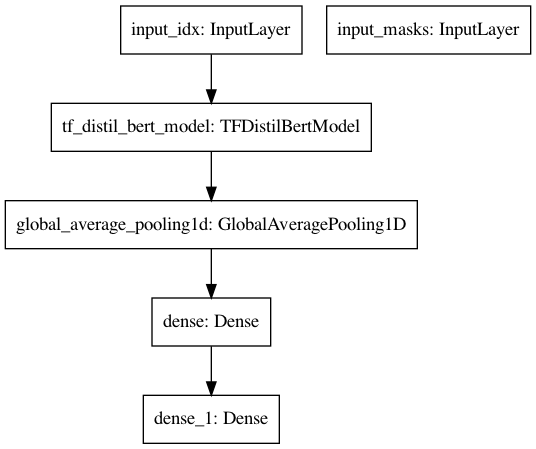

In [40]:
plot_model(model)  # option to_file=

In [41]:
# Create label y
dic_y_mapping = {n:label for n,label in enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()} 
y_train = np.array([inverse_dic[y] for y in y_train])

In [42]:
len(X_train[1])

1811

In [43]:
## train
training = model.fit(x=X_train[:2], y=y_train, batch_size=32, epochs=25, shuffle=True, verbose=1, validation_split=0.3)

Epoch 1/25
40/40 [==============================] - 269s 7s/step - loss: 0.7389 - accuracy: 0.6511 - val_loss: 0.5624 - val_accuracy: 0.7518
Epoch 2/25
 3/40 [=>............................] - ETA: 3:33 - loss: 0.5593 - accuracy: 0.7604

KeyboardInterrupt: 

In [99]:
# INPUT STRUCTURE FOR TEST DATASET
corpus = df_test["Text"]

# Create a string of BERT and word tokens 
corpus_tokenized = ["[CLS] "+" ".join(tokenizer.tokenize(re.sub(r'[^\w\s]+|\n', '',
                    str(txt).lower().strip()))[:max_seq_length])+" [SEP] " for txt in corpus]

## 1. Generate index values for the tokens and add padding, then make sure tokens are at max sequence length
txt2seq = [txt + " [PAD]"*(10+max_seq_length-len(txt.split(" "))) for txt in corpus_tokenized] # added 10 for extra padding (hack)
idx = [tokenizer.encode(seq)[1:-1][:max_seq_length] for seq in txt2seq]  # Need to drop the first and last element, and set no of token to max_seq_len

## 2. Generate masks
masks = [[1]*len(txt.split(" ")) + [0]*(max_seq_length - len( txt.split(" "))) for txt in corpus_tokenized]

## 3. Generate segments
segments = [] 
for seq in txt2seq: 
    temp, i = [], 0
    for token in seq.split(" "): 
        temp.append(i)
        if token == "[SEP]": 
            i += 1
    segments.append(temp)

# Finally, put all 3 elements into a feature matrix
X_test = [asarray(idx, dtype='int32'), 
           asarray(masks, dtype='int32'),
           asarray(segments, dtype='int32')]   

In [100]:
## test labels
predicted_prob = model.predict(X_test[:2])   
dic_y_mapping = {0:'negative', 1:'neutral', 2:'positive'}  # for the financial phrase bank dataset
predicted = [dic_y_mapping[argmax(pred)] for pred in predicted_prob]

In [101]:
accuracy = metrics.accuracy_score(y_test, predicted) 
# auc = metrics.roc_auc_score(y_test, predicted_prob[:,1])  # only for binary classification
print("Accuracy:", round(accuracy,2))
# print("Auc:", round(auc,2))
print("Detail:") 
print(metrics.classification_report(y_test, predicted))
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

Accuracy: 0.84
Detail:
              precision    recall  f1-score   support

    negative       0.60      0.62      0.61        64
     neutral       0.94      0.94      0.94       281
    positive       0.72      0.69      0.70       108

    accuracy                           0.84       453
   macro avg       0.75      0.75      0.75       453
weighted avg       0.84      0.84      0.84       453

[[ 40   4  20]
 [  7 265   9]
 [ 20  14  74]]


- TFIDF accuracy = 80-85%
- Word2Vec accuracy = 70-75%
- BERT accuracy = 82-89%

## REFERENCES

1. https://towardsdatascience.com/a-no-frills-guide-to-most-natural-language-processing-models-the-transformer-xl-era-ff5035f04e0f

2. Using BERT for the first time (by J Alammar): http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/; code: https://colab.research.google.com/github/jalammar/jalammar.github.io/blob/master/notebooks/bert/A_Visual_Notebook_to_Using_BERT_for_the_First_Time.ipynb

3. Stanford Sentiment Treebank: https://nlp.stanford.edu/sentiment/index.html

## From the reference above, using the SST dataset (movie reviews)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [45]:
df_large = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', delimiter='\t', header=None)
print(df_large.shape)
df_large.head()

(6920, 2)


,0,1
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [46]:
# Is the dataset balanced in labels?
df = df_large[:1500]  # take a small subset
df[1].value_counts()

1    782
0    718
Name: 1, dtype: int64

## Get the pre-trained model

In [47]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [48]:
# Get tokenized version
tokenized = df[0].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))
print(tokenized.shape)
tokenized[0]

(1500,)


[101,
 1037,
 18385,
 1010,
 6057,
 1998,
 2633,
 18276,
 2128,
 16603,
 1997,
 5053,
 1998,
 1996,
 6841,
 1998,
 5687,
 5469,
 3152,
 102]

## Construct token IDs and masks

In [49]:
# Add padding and set max len to the longest entry in the dataset
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = array([i + [0]*(max_len-len(i)) for i in tokenized.values])
print(array(padded).shape)
padded[:3]

(1500, 59)


array([[  101,  1037, 18385,  1010,  6057,  1998,  2633, 18276,  2128,
        16603,  1997,  5053,  1998,  1996,  6841,  1998,  5687,  5469,
         3152,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [  101,  4593,  2128, 27241, 23931,  2013,  1996,  6276,  2282,
         2723,  1997,  2151,  2445, 12217,  7815,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [  101,  2027,  3653, 23545,  2037,  4378, 24185,  10

In [50]:
# Add a mask to let BERT know where the real tokens are and not the padding
# Essentially we can use zero for the padding mask so those tokens do not compute
attention_mask = where(padded != 0, 1, 0)
print(attention_mask.shape)
attention_mask[:3]

(1500, 59)


array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

## Run token IDs and attention masks through BERT to get embeddings

In [51]:
%%time
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)  #embeddings

CPU times: user 2min 1s, sys: 25.8 s, total: 2min 27s
Wall time: 2min 48s


In [52]:
# Embeddings from BERT
print(len(last_hidden_states[0][:,0,:]))
last_hidden_states[0][:,0,:]

1500


tensor([[-0.2159, -0.1403,  0.0083,  ..., -0.1369,  0.5867,  0.2011],
        [-0.1726, -0.1448,  0.0022,  ..., -0.1744,  0.2139,  0.3720],
        [-0.0506,  0.0720, -0.0296,  ..., -0.0715,  0.7185,  0.2623],
        ...,
        [ 0.0062,  0.0426, -0.1080,  ..., -0.0417,  0.6836,  0.3451],
        [ 0.0087,  0.0605, -0.3309,  ..., -0.2005,  0.6268,  0.1546],
        [-0.2395, -0.1362,  0.0463,  ..., -0.0285,  0.2219,  0.3242]])

In [53]:
# Collect the CLS embedding and labels to set up the classification task
features = last_hidden_states[0][:,0,:].numpy()
labels = df[1]
print(features.shape)

(1500, 768)


## Use the BERT transformed dataset for machine learning as usual

In [54]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)
lr_clf.score(test_features, test_labels)

0.8213333333333334

## Speed

As you can see, BERT runs slow, so it is good to use a machine with GPUs. For more on computation speed, see: https://blog.inten.to/speeding-up-bert-5528e18bb4ea